In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-05-02-01-01-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-05-02-02-01-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-04-01-02-02-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-07-02-01-02-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-08-02-02-01-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-04-02-02-01-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-06-01-01-02-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-05-01-01-02-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-05-01-01-01-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-07-02-02-02-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-04-01-01-01-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_22/03-01-05-01-02-02-22.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa as ls
import os

In [3]:
emotion_dic = {
                '01' : 'neutral', 
                '02' : 'calm' ,
                '03' : 'happy' ,
                '04' : 'sad' ,
                '05' : 'angry', 
                '06' : 'fearful' ,
                '07' : 'disgust', 
                '08' : 'surprised'
}

In [55]:
our_emotion = ['happy','sad','angry','disgust']

In [4]:
from glob import glob

In [10]:
def extract_feature(file_name, mfcc, chroma, mel):
        X,sample_rate = ls.load(file_name)
        if chroma:
            stft=np.abs(ls.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(ls.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(ls.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(ls.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result


In [5]:
audio_files = glob('/kaggle/input/ravdess-emotional-speech-audio'+'/*/*.wav')

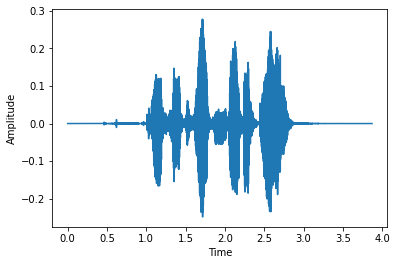

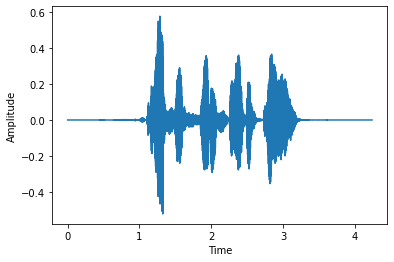

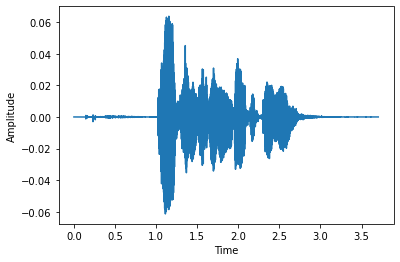

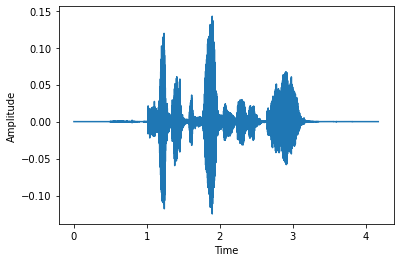

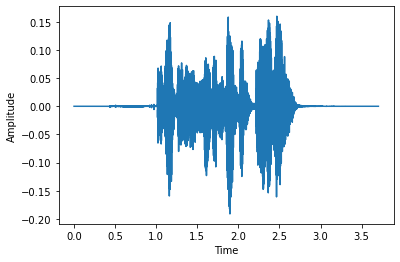

In [99]:
for i in range(5):
    audio,sfreq = ls.load(audio_files[i])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [56]:
x,y=[],[]
from IPython.display import clear_output
e = set()
for file in audio_files:
        clear_output(wait=True)
        file_name = file.split('/')[-1]
        emotion=emotion_dic[file_name.split("-")[2]]
        if emotion not in our_emotion:
            continue
        e.add(file.split('/')[-2])
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        print(e)
        x.append(feature)
        y.append(emotion)

{'Actor_17', 'Actor_23', 'Actor_12', 'Actor_18', 'Actor_22', 'Actor_24', 'Actor_16', 'Actor_19', 'Actor_07', 'Actor_13', 'Actor_06', 'Actor_01', 'Actor_04', 'Actor_15', 'Actor_02', 'Actor_10', 'Actor_08', 'Actor_14', 'Actor_11', 'Actor_09', 'Actor_21', 'Actor_03', 'Actor_20', 'Actor_05'}


In [57]:
x = np.array(x)
x

array([[-4.77760864e+02,  3.20947495e+01, -1.61663113e+01, ...,
         1.06565049e-03,  2.37102664e-04,  1.82544081e-05],
       [-4.33953125e+02,  2.38700790e+01, -1.53370686e+01, ...,
         4.37484263e-03,  1.12195790e-03,  7.36144211e-05],
       [-6.20730286e+02,  4.57190781e+01, -5.86995411e+00, ...,
         2.69782438e-04,  1.06457599e-04,  6.60381920e-06],
       ...,
       [-3.98406708e+02,  2.49716759e+01, -1.38114977e+01, ...,
         3.53927584e-03,  1.13661785e-03,  6.65335247e-05],
       [-5.48062744e+02,  4.08813286e+01, -7.65137815e+00, ...,
         1.20860524e-04,  3.80841084e-05,  2.84313251e-06],
       [-6.78135681e+02,  6.10025826e+01,  7.99153805e+00, ...,
         3.66158019e-06,  9.27077508e-07,  6.41018261e-08]])

In [58]:
y

['angry',
 'angry',
 'sad',
 'disgust',
 'sad',
 'angry',
 'angry',
 'disgust',
 'sad',
 'angry',
 'disgust',
 'angry',
 'angry',
 'happy',
 'angry',
 'sad',
 'happy',
 'happy',
 'happy',
 'sad',
 'disgust',
 'disgust',
 'happy',
 'disgust',
 'disgust',
 'happy',
 'sad',
 'sad',
 'happy',
 'sad',
 'disgust',
 'happy',
 'angry',
 'happy',
 'sad',
 'happy',
 'disgust',
 'disgust',
 'disgust',
 'happy',
 'sad',
 'happy',
 'angry',
 'angry',
 'happy',
 'happy',
 'sad',
 'disgust',
 'happy',
 'sad',
 'angry',
 'sad',
 'happy',
 'disgust',
 'disgust',
 'angry',
 'angry',
 'sad',
 'sad',
 'disgust',
 'angry',
 'angry',
 'disgust',
 'sad',
 'happy',
 'happy',
 'sad',
 'disgust',
 'happy',
 'angry',
 'happy',
 'sad',
 'angry',
 'disgust',
 'disgust',
 'happy',
 'disgust',
 'happy',
 'happy',
 'sad',
 'disgust',
 'angry',
 'angry',
 'disgust',
 'angry',
 'sad',
 'angry',
 'sad',
 'angry',
 'sad',
 'disgust',
 'angry',
 'sad',
 'happy',
 'sad',
 'disgust',
 'disgust',
 'angry',
 'happy',
 'disgus

In [59]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([0, 0, 3, 1, 3, 0, 0, 1, 3, 0, 1, 0, 0, 2, 0, 3, 2, 2, 2, 3, 1, 1,
       2, 1, 1, 2, 3, 3, 2, 3, 1, 2, 0, 2, 3, 2, 1, 1, 1, 2, 3, 2, 0, 0,
       2, 2, 3, 1, 2, 3, 0, 3, 2, 1, 1, 0, 0, 3, 3, 1, 0, 0, 1, 3, 2, 2,
       3, 1, 2, 0, 2, 3, 0, 1, 1, 2, 1, 2, 2, 3, 1, 0, 0, 1, 0, 3, 0, 3,
       0, 3, 1, 0, 3, 2, 3, 1, 1, 0, 2, 1, 3, 0, 1, 3, 0, 1, 2, 2, 3, 3,
       2, 0, 3, 1, 3, 2, 3, 1, 2, 2, 0, 0, 3, 0, 2, 1, 0, 1, 1, 0, 2, 0,
       2, 3, 0, 0, 3, 2, 0, 1, 3, 1, 3, 2, 2, 0, 3, 3, 0, 1, 1, 3, 2, 1,
       1, 2, 1, 3, 0, 2, 2, 3, 2, 1, 1, 3, 0, 0, 2, 1, 0, 0, 1, 3, 1, 3,
       3, 0, 1, 3, 2, 0, 0, 3, 2, 2, 0, 1, 2, 2, 3, 1, 3, 0, 0, 3, 2, 0,
       3, 2, 2, 1, 3, 1, 1, 1, 0, 1, 0, 1, 3, 1, 2, 0, 1, 3, 2, 3, 2, 2,
       0, 3, 2, 0, 0, 3, 2, 1, 1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 3, 0, 3, 0,
       2, 3, 2, 1, 0, 3, 2, 3, 3, 2, 1, 2, 2, 0, 3, 1, 1, 2, 1, 2, 0, 3,
       2, 1, 3, 3, 2, 1, 0, 0, 2, 3, 1, 0, 3, 3, 1, 3, 2, 0, 0, 1, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 1, 0, 3, 0, 1, 3, 2, 0,

In [60]:
y = to_categorical(y)
print(y.shape)
print(y)

(768, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x = scaler.fit_transform(x)


In [68]:
x

array([[6.75478743e-01, 3.63635270e-01, 4.71825927e-01, ...,
        4.26711057e-02, 2.81632894e-02, 2.45956897e-02],
       [7.57387178e-01, 2.82928744e-01, 4.82560560e-01, ...,
        1.75196024e-01, 1.33306914e-01, 9.92179227e-02],
       [4.08165212e-01, 4.97327222e-01, 6.05113344e-01, ...,
        1.07985688e-02, 1.26392860e-02, 8.89134070e-03],
       ...,
       [8.23849210e-01, 2.93738424e-01, 5.02309234e-01, ...,
        1.41733652e-01, 1.35048894e-01, 8.96732662e-02],
       [5.44033546e-01, 4.49855659e-01, 5.82052624e-01, ...,
        4.83461633e-03, 4.51475186e-03, 3.82214321e-03],
       [3.00832897e-01, 6.47300230e-01, 7.84551806e-01, ...,
        1.41089961e-04, 9.95382258e-05, 7.61636915e-05]])

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42,shuffle=True)

In [80]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

In [73]:
x = np.expand_dims(x,axis=2)

In [90]:
model = Sequential()
model.add(Dense(256,input_shape=(x.shape[1],1)))
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(Dense(256))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 180, 256)          512       
_________________________________________________________________
dense_36 (Dense)             (None, 180, 512)          131584    
_________________________________________________________________
dropout_10 (Dropout)         (None, 180, 512)          0         
_________________________________________________________________
dense_37 (Dense)             (None, 180, 512)          262656    
_________________________________________________________________
dense_38 (Dense)             (None, 180, 256)          131328    
_________________________________________________________________
flatten_8 (Flatten)          (None, 46080)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 4)               

In [96]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size = 64,epochs=150,validation_data=(x_test,y_test))

Train on 691 samples, validate on 77 samples
Epoch 1/150
691/691 [==============================] - 5s 7ms/step - loss: 0.7522 - accuracy: 0.6990 - val_loss: 1.3946 - val_accuracy: 0.4805
Epoch 2/150
691/691 [==============================] - 4s 6ms/step - loss: 0.6891 - accuracy: 0.7164 - val_loss: 1.1900 - val_accuracy: 0.5584
Epoch 3/150
691/691 [==============================] - 4s 6ms/step - loss: 0.6343 - accuracy: 0.7540 - val_loss: 1.1250 - val_accuracy: 0.5844
Epoch 4/150
691/691 [==============================] - 4s 6ms/step - loss: 0.6014 - accuracy: 0.7525 - val_loss: 1.1233 - val_accuracy: 0.5844
Epoch 5/150
691/691 [==============================] - 4s 6ms/step - loss: 0.6136 - accuracy: 0.7540 - val_loss: 1.1917 - val_accuracy: 0.5844
Epoch 6/150
691/691 [==============================] - 4s 6ms/step - loss: 0.6220 - accuracy: 0.7482 - val_loss: 1.1296 - val_accuracy: 0.5844
Epoch 7/150
691/691 [==============================] - 4s 6ms/step - loss: 0.6264 - accuracy: 0.7

In [97]:
model.save('Speech-Emotion-Recognition.h5')